In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv', sep=',', header=0)

In [3]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

We can see that there are 201 NaN values in the bmi feature. We will need to perform some processing to handle the missing values.

# EDA

/tmp/ipykernel_4273/856057474.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


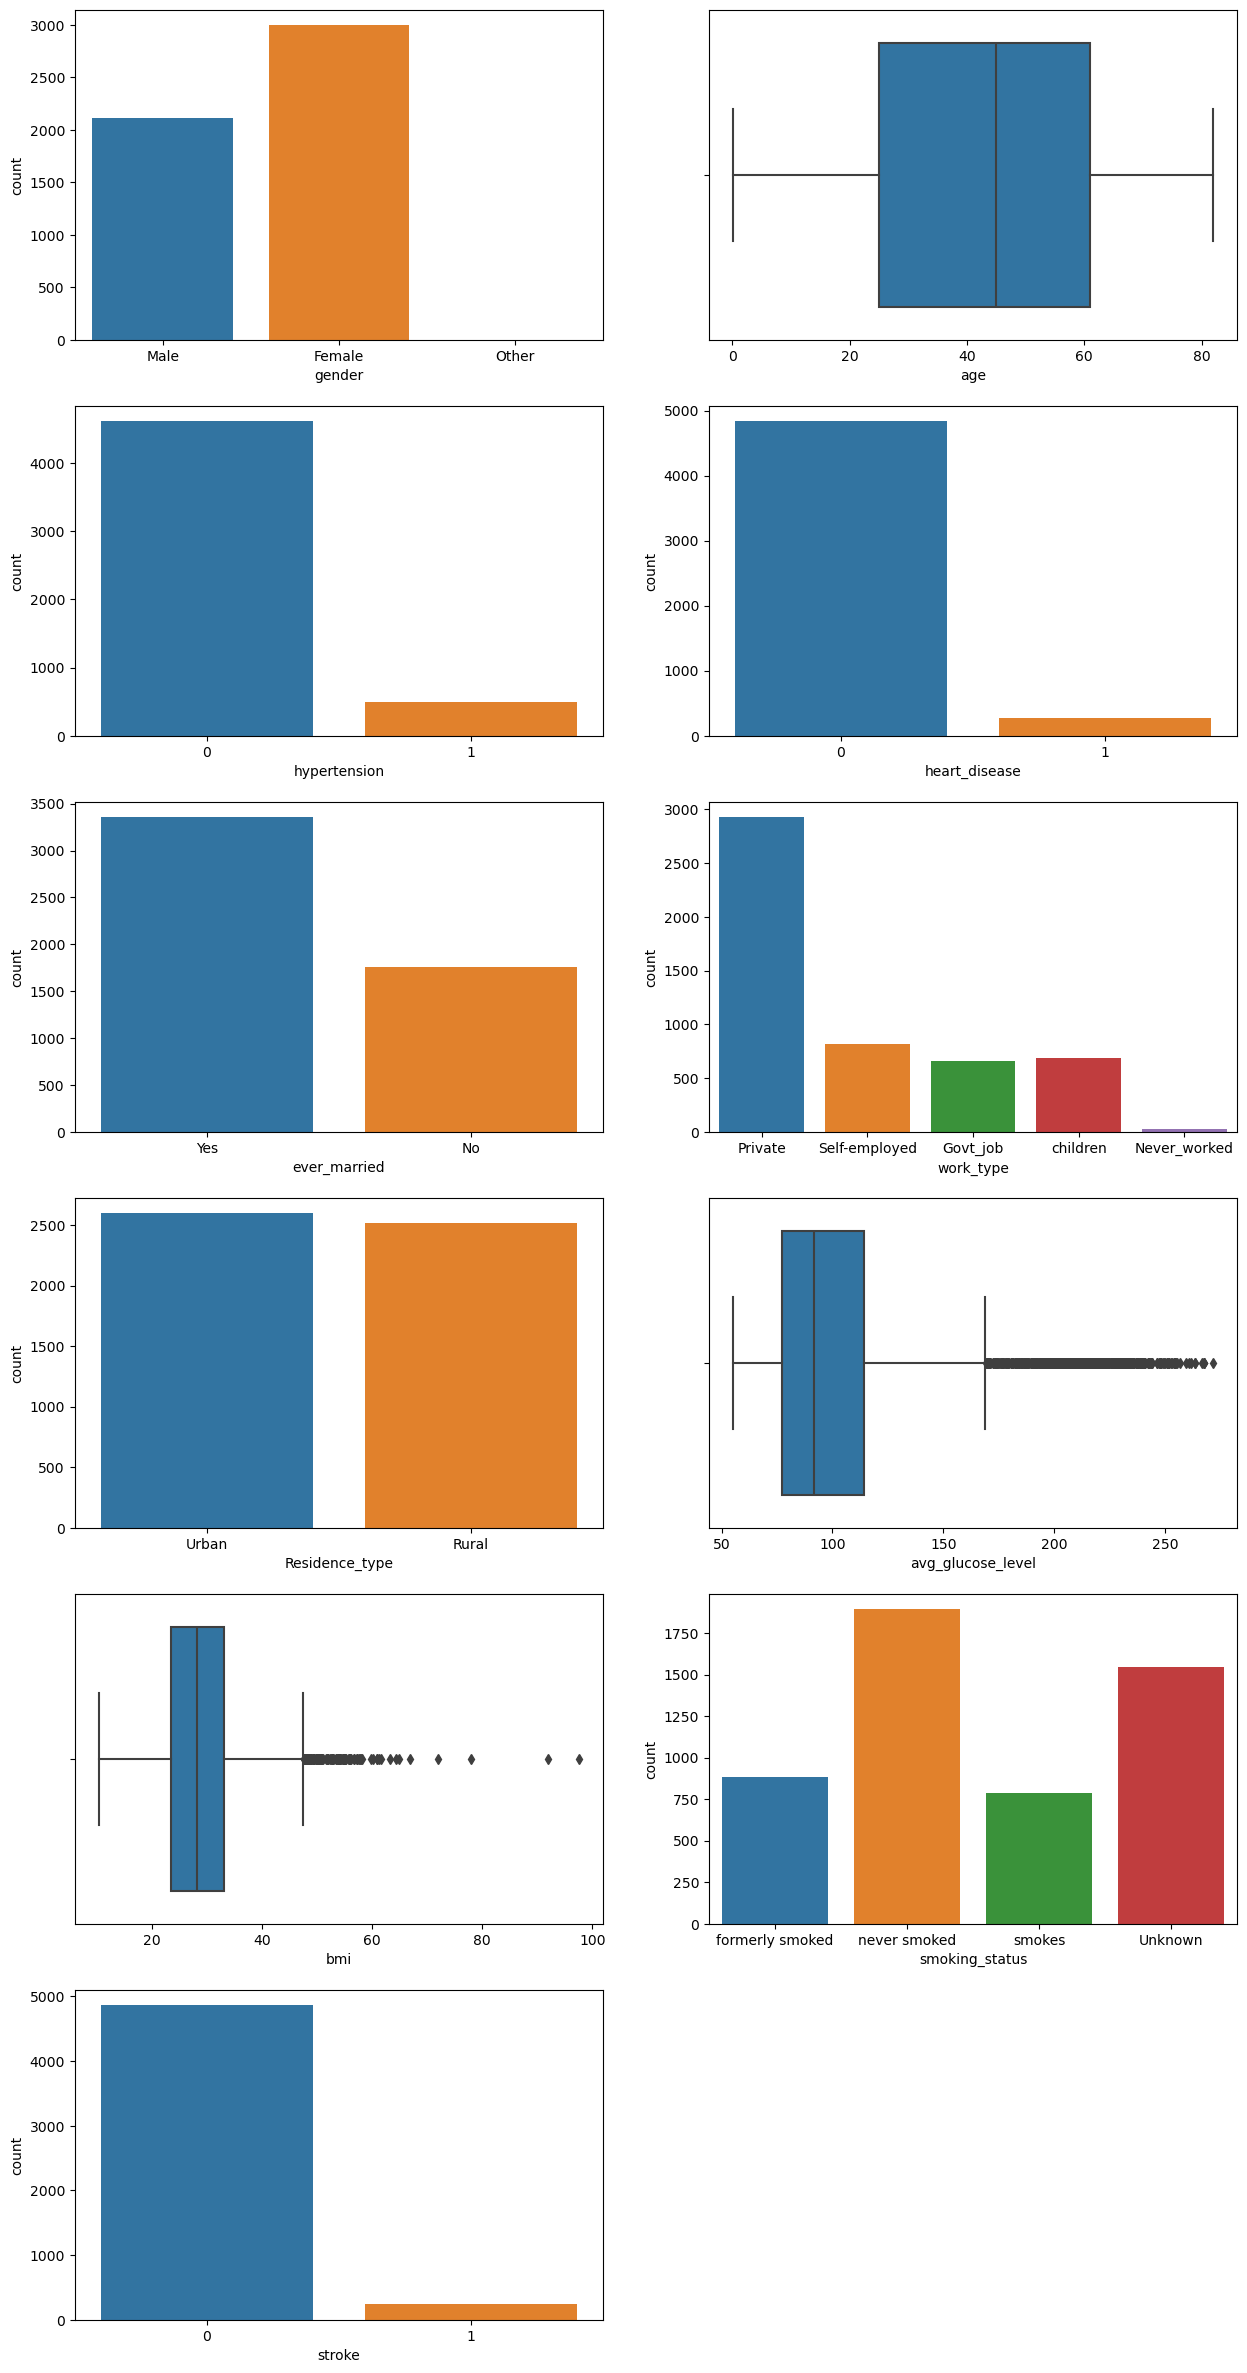

In [6]:
fig, ax = plt.subplots(6, 2, figsize=(15, 30))
sns.countplot(x='gender', data=df, ax=ax[0, 0])
sns.boxplot(x='age', data=df, ax=ax[0, 1])

sns.countplot(x='hypertension', data=df, ax=ax[1, 0])
sns.countplot(x='heart_disease', data=df, ax=ax[1, 1])

sns.countplot(x='ever_married', data=df, ax=ax[2, 0])
sns.countplot(x='work_type', data=df, ax=ax[2, 1])

sns.countplot(x='Residence_type', data=df, ax=ax[3, 0])
sns.boxplot(x='avg_glucose_level', data=df, ax=ax[3, 1])

sns.boxplot(x='bmi', data=df, ax=ax[4, 0])
sns.countplot(x='smoking_status', data=df, ax=ax[4, 1])

sns.countplot(x='stroke', data=df, ax=ax[5, 0])
ax[5, 1].axis('off')
fig.show()

'avg_glucose_level' and 'bmi' seem to have a lot of outliers. Let's try to understand if they are related to the stroke outcome or not, or to any other specific variables

In [7]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

We have a single observation that has a different category from all the other observations. Taking, that into consideration, it is understandable to remove it since it most likely an error in the dataset and since it isn't representative of the population. Let's analyze the observation and the values of the other features to understand if there is critical information related to it.

In [8]:
df.loc[df['gender'] == 'Other']
df.drop(df.loc[df['gender'] ==' Other'].index, inplace=True)

/tmp/ipykernel_4273/2282358481.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


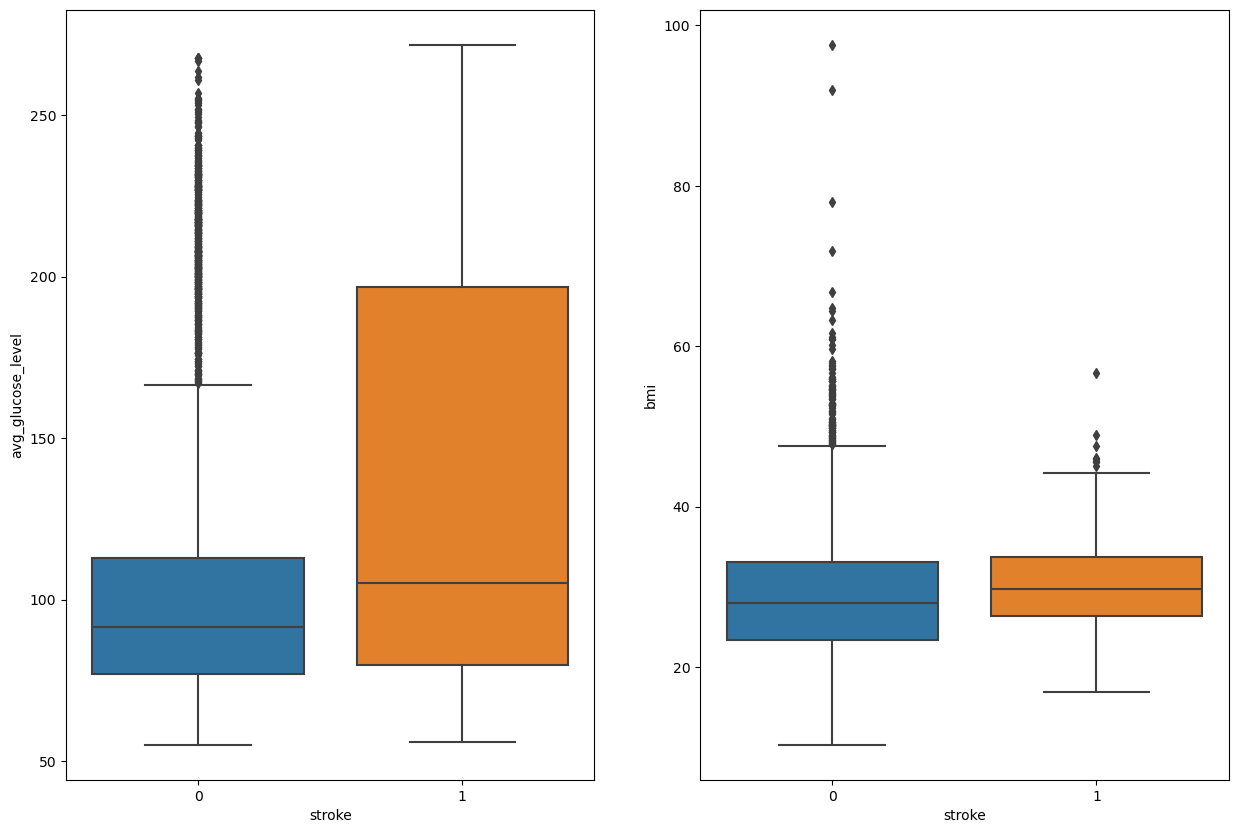

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
sns.boxplot(x='stroke', y='avg_glucose_level', data=df, ax=ax[0])
sns.boxplot(x='stroke', y='bmi', data=df, ax=ax[1])
fig.show()

We need to analyze how the data points that have a missing bmi behave. This is important because we need to understand the best way to handle these outliers.

In [10]:
# Let's analyze the values that correspond to the missing values in bmi
missing_bmi = df[df['bmi'].isna()]

In [11]:
missing_bmi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 1 to 5105
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 201 non-null    int64  
 1   gender             201 non-null    object 
 2   age                201 non-null    float64
 3   hypertension       201 non-null    int64  
 4   heart_disease      201 non-null    int64  
 5   ever_married       201 non-null    object 
 6   work_type          201 non-null    object 
 7   Residence_type     201 non-null    object 
 8   avg_glucose_level  201 non-null    float64
 9   bmi                0 non-null      float64
 10  smoking_status     201 non-null    object 
 11  stroke             201 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 20.4+ KB


/tmp/ipykernel_4273/4204631965.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


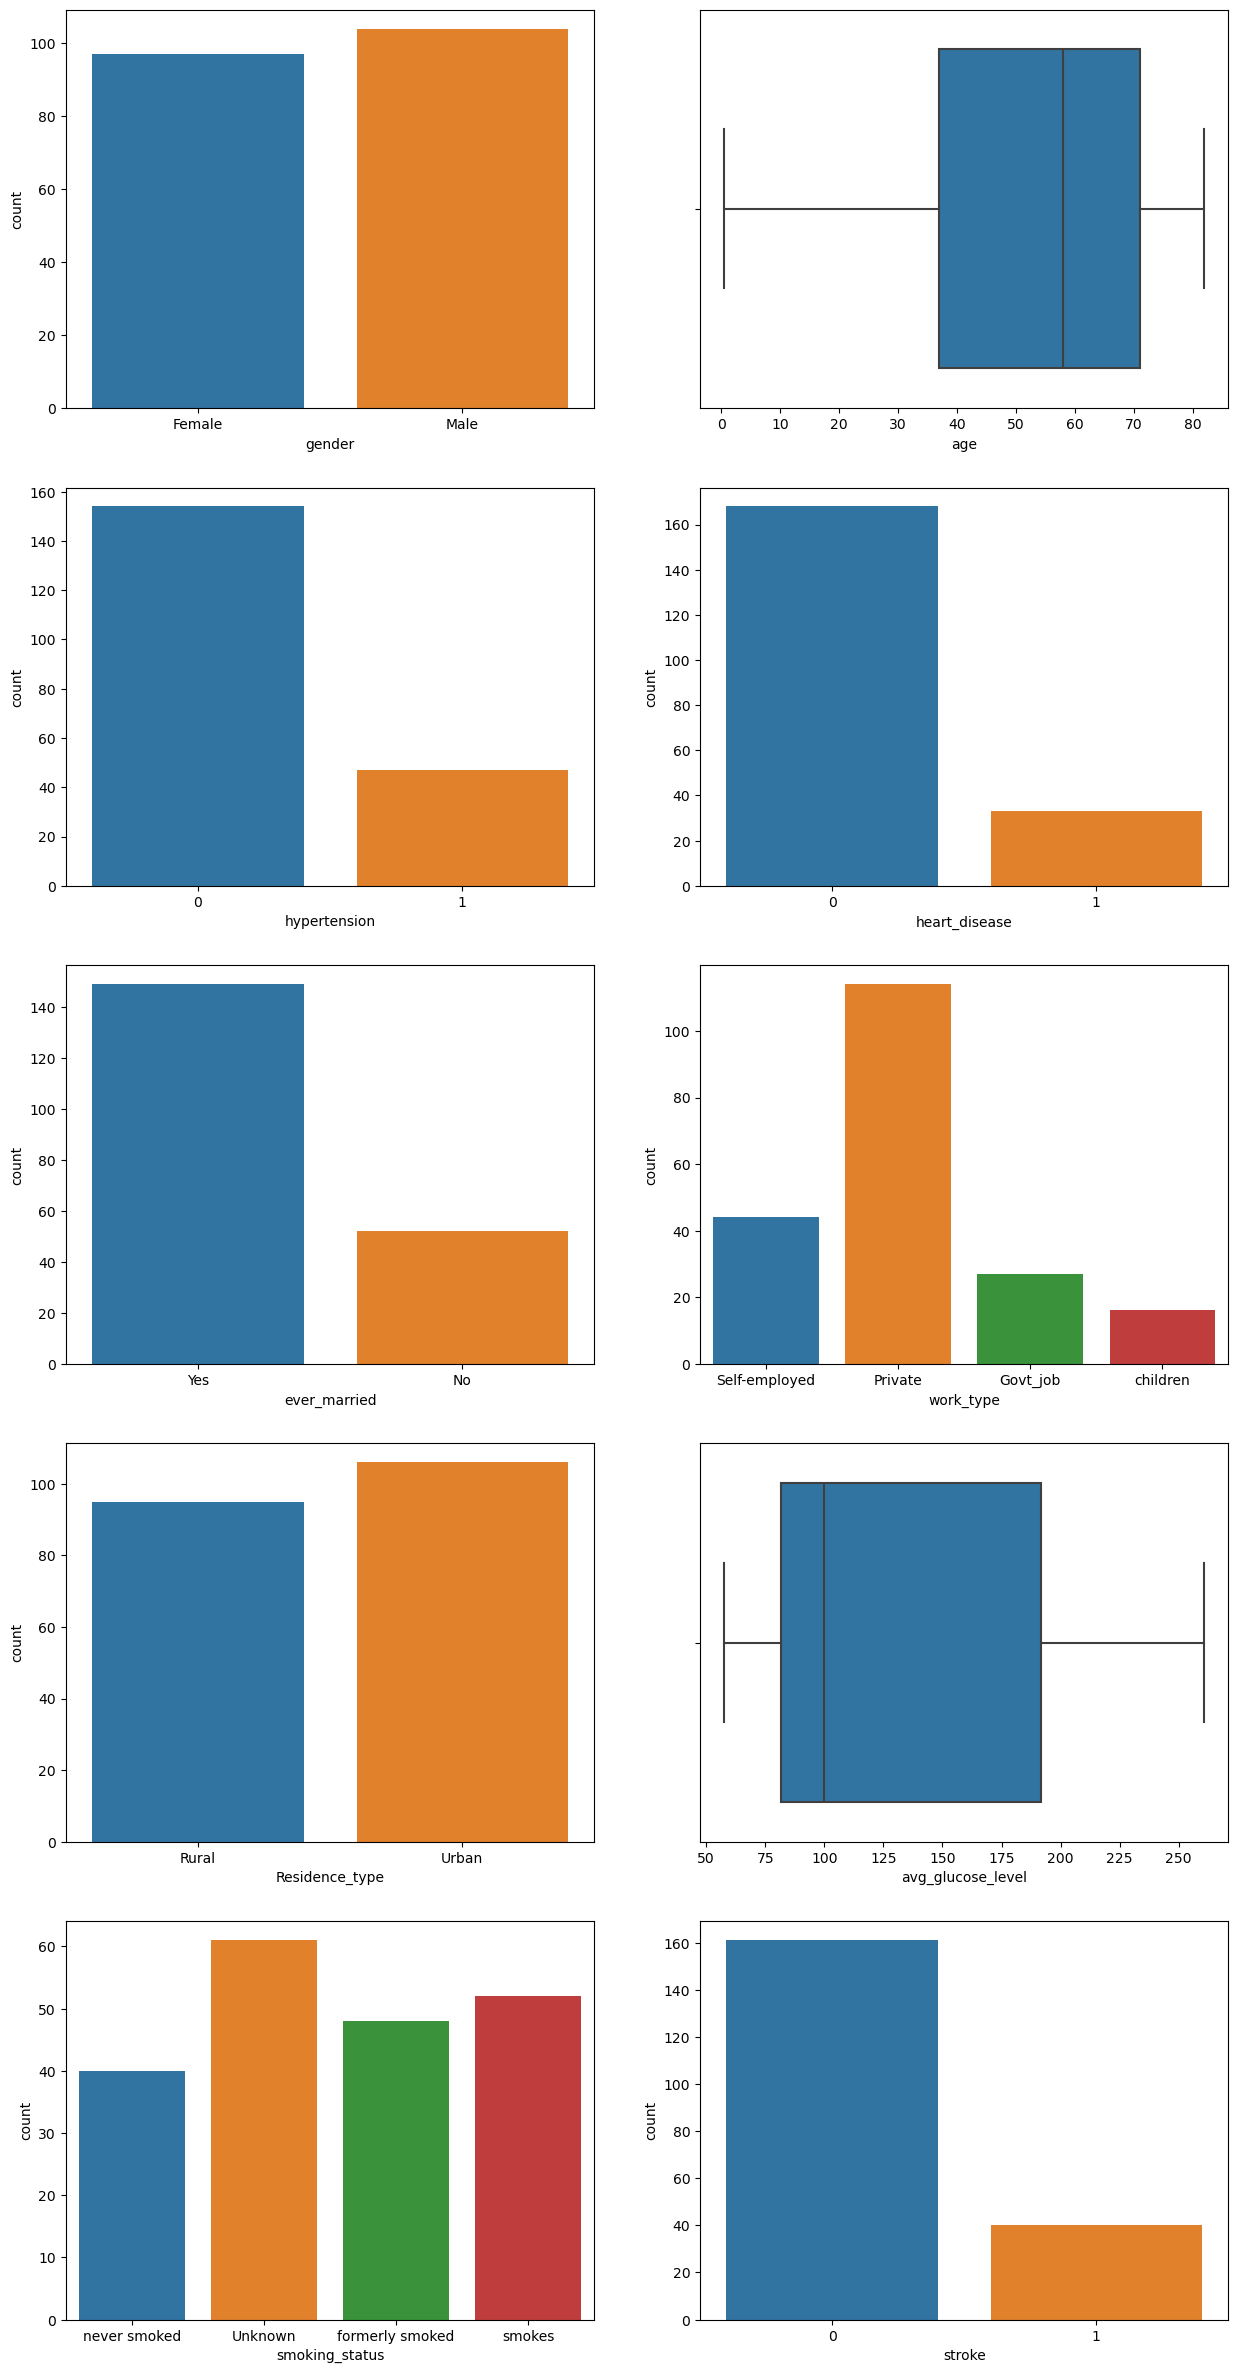

In [12]:
fig, ax = plt.subplots(5, 2, figsize=(15, 30))
sns.countplot(x='gender', data=missing_bmi, ax=ax[0, 0])
sns.boxplot(x='age', data=missing_bmi, ax=ax[0, 1])

sns.countplot(x='hypertension', data=missing_bmi, ax=ax[1, 0])
sns.countplot(x='heart_disease', data=missing_bmi, ax=ax[1, 1])

sns.countplot(x='ever_married', data=missing_bmi, ax=ax[2, 0])
sns.countplot(x='work_type', data=missing_bmi, ax=ax[2, 1])

sns.countplot(x='Residence_type', data=missing_bmi, ax=ax[3, 0])
sns.boxplot(x='avg_glucose_level', data=missing_bmi, ax=ax[3, 1])

sns.countplot(x='smoking_status', data=missing_bmi, ax=ax[4, 0])
sns.countplot(x='stroke', data=missing_bmi, ax=ax[4, 1])

fig.show()

In [13]:
total_stroke = (df['stroke'] == 1).sum()
total_stroke_missing_bmi = (missing_bmi['stroke'] == 1).sum()
print(f'After removing missing bmi rows, we lose {total_stroke_missing_bmi} positive stroke rows\nWe still have {total_stroke-total_stroke_missing_bmi}')

After removing missing bmi rows, we lose 40 positive stroke rows
We still have 209


It appears that the missing values in the bmi columns are random. There still is a similar distribution to the original dataset regarding the stroke target and the other features.
After evaluating the models, if the results aren't good enough, we will come back to this step and fill in the missing bmi values using other techniques.

In [14]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


It also makes sense to remove the id column since it doesn't give any relevant information towards a patient having a stroke or not as we can see from the following plot. And it also doesn't have any relation to the patient besides being a random number associated with the patient

<Axes: xlabel='stroke', ylabel='id'>

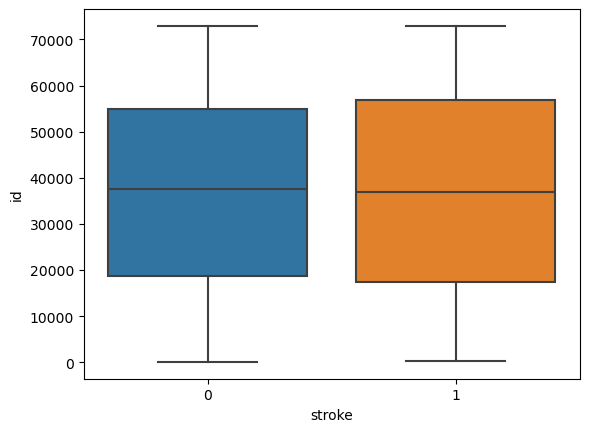

In [15]:
sns.boxplot(x='stroke', y='id', data=df)

In [16]:
df.drop(columns=['id'], inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


# Pre-processing

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from sklearn.base import BaseEstimator, TransformerMixin


X = df.drop(columns=['stroke'], inplace=False)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=0)

# Stratified Dataset Shuffle Split
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [19]:
class ConvertYesNo(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Convert 'Yes' to 1 and 'No' to 0
        X['ever_married'] = X['ever_married'].map({'Yes': 1, 'No': 0})
        return X

numerical_vars = ['age', 'avg_glucose_level', 'bmi']
categorical_vars = ['gender', 'work_type', 'Residence_type', 'smoking_status']
yes_no_vars = ['ever_married']

one_hot_pipeline = ColumnTransformer([
    ('convertyesno', ConvertYesNo(), yes_no_vars),
    ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_vars)
])

min_max_pipeline = ColumnTransformer([
    ('convertyesno', ConvertYesNo(), yes_no_vars),
    ('min_max_scaler', MinMaxScaler(), numerical_vars),
    ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_vars)
])

std_pipeline = ColumnTransformer([
    ('convertyesno', ConvertYesNo(), yes_no_vars),
    ('std_scaler', StandardScaler(), numerical_vars),
    ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_vars)
])


# Models

## XGBoost

In [30]:
from xgboost import XGBClassifier

xgboost_pipe = Pipeline(steps=[
    ('onehotencoding', one_hot_pipeline),
    ("xgboost", XGBClassifier())
])

# Define the hyperparameter grid
param_grid = {
    'xgboost__max_depth': [3, 5, 7],
    'xgboost__learning_rate': [0.1, 0.01, 0.001],
    'xgboost__subsample': [0.5, 0.7, 1],
    'xgboost__n_estimators': range(50, 400, 50)
}

# Create the GridSearchCV object
grid_search = GridSearchCV(xgboost_pipe, param_grid, cv=sss)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
grid_search.score(X_test, y_test)

# Obtain the confusion matrix and evaluate the precision and recall metrics for each of the classes
y_hat = grid_search.predict(X_test)
print(confusion_matrix(y_test, y_hat))

xgboost_matrix = precision_recall_fscore_support(y_test, y_hat, average=None)
xgboost_report = classification_report(y_test, y_hat, output_dict=True)

{'xgboost__learning_rate': 0.1, 'xgboost__max_depth': 3, 'xgboost__n_estimators': 50, 'xgboost__subsample': 0.5}
[[940   0]
 [ 42   0]]


/home/johnloyal/miniconda3/envs/ds/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/johnloyal/miniconda3/envs/ds/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/johnloyal/miniconda3/envs/ds/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

## Decision Tree

In [31]:
decision_tree_pipe = Pipeline(steps=[
    ('onehotencoding', one_hot_pipeline),
    ("tree", DecisionTreeClassifier())
])

param_grid = {
              'tree__max_depth': [3, 5, 6, 7, 8],
              'tree__criterion': ['gini', 'entropy', 'log_loss']
             }

decision_tree_grid = GridSearchCV(decision_tree_pipe, param_grid=param_grid, cv=sss)
decision_tree_grid.fit(X_train, y_train)

print(decision_tree_grid.best_params_)
# plot_tree(decision_tree_grid.best_estimator_['tree'])
decision_tree_grid.score(X_test, y_test)

# Obtain the confusion matrix and evaluate the precision and recall metrics for each of the classes
y_hat = decision_tree_grid.predict(X_test)
print(confusion_matrix(y_test, y_hat))

tree_matrix = precision_recall_fscore_support(y_test, y_hat, average=None)
tree_report = classification_report(y_test, y_hat, output_dict=True)

{'tree__criterion': 'gini', 'tree__max_depth': 3}
[[940   0]
 [ 42   0]]


/home/johnloyal/miniconda3/envs/ds/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/johnloyal/miniconda3/envs/ds/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/johnloyal/miniconda3/envs/ds/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

## Logistic Regression

In [32]:
from sklearn.linear_model  import LogisticRegression

lr_pipe = Pipeline(steps=[
    ("preprocessor", min_max_pipeline),
    ("lr", LogisticRegression())
])

param_grid = {
              'lr__C': [1, 10, 100, 1000],
              'lr__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
              'lr__max_iter': [100, 1000, 2000],
              'lr__class_weight': ['balanced', None]
             }


lr_pipe = GridSearchCV(lr_pipe, param_grid=param_grid, cv=sss)
lr_pipe.fit(X_train, y_train)

print(lr_pipe.best_params_)
# plot_tree(decision_tree_grid.best_estimator_['tree'])
# Obtain the mean accuracy on the test data
lr_pipe.score(X_test, y_test)

# Obtain the confusion matrix and evaluate the precision and recall metrics for each of the classes
y_hat = lr_pipe.predict(X_test)
print(confusion_matrix(y_test, y_hat))

lr_matrix = precision_recall_fscore_support(y_test, y_hat, average=None)
lr_report = classification_report(y_test, y_hat, output_dict=True)

/home/johnloyal/miniconda3/envs/ds/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/johnloyal/miniconda3/envs/ds/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/johnloyal/miniconda3/envs/ds/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/johnloyal/miniconda3/envs/ds/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/johnloyal/miniconda3/envs/ds/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home

{'lr__C': 10, 'lr__class_weight': None, 'lr__max_iter': 100, 'lr__solver': 'lbfgs'}
[[940   0]
 [ 42   0]]


/home/johnloyal/miniconda3/envs/ds/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/johnloyal/miniconda3/envs/ds/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/johnloyal/miniconda3/envs/ds/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

## SVM

In [33]:
svm_pipe = Pipeline(steps=[
    ("preprocessor", min_max_pipeline),
    ("svc", SVC())
])

param_grid = {
              'svc__kernel': ['poly', 'rbf', 'sigmoid'],
              'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'svc__gamma': [0.0001, 0.001, 0.01, 0.1]
             }

svm_grid = GridSearchCV(svm_pipe, param_grid=param_grid, cv=sss)
svm_grid.fit(X_train, y_train)

print(svm_grid.best_params_)
y_hat = svm_grid.predict(X_test)

print(confusion_matrix(y_test, y_hat))
svm_grid.score(X_test, y_test)

svm_matrix = precision_recall_fscore_support(y_test, y_hat, average=None)
svm_report = classification_report(y_test, y_hat, output_dict=True)

{'svc__C': 0.001, 'svc__gamma': 0.0001, 'svc__kernel': 'poly'}
[[940   0]
 [ 42   0]]


/home/johnloyal/miniconda3/envs/ds/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/johnloyal/miniconda3/envs/ds/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/johnloyal/miniconda3/envs/ds/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

<Axes: >

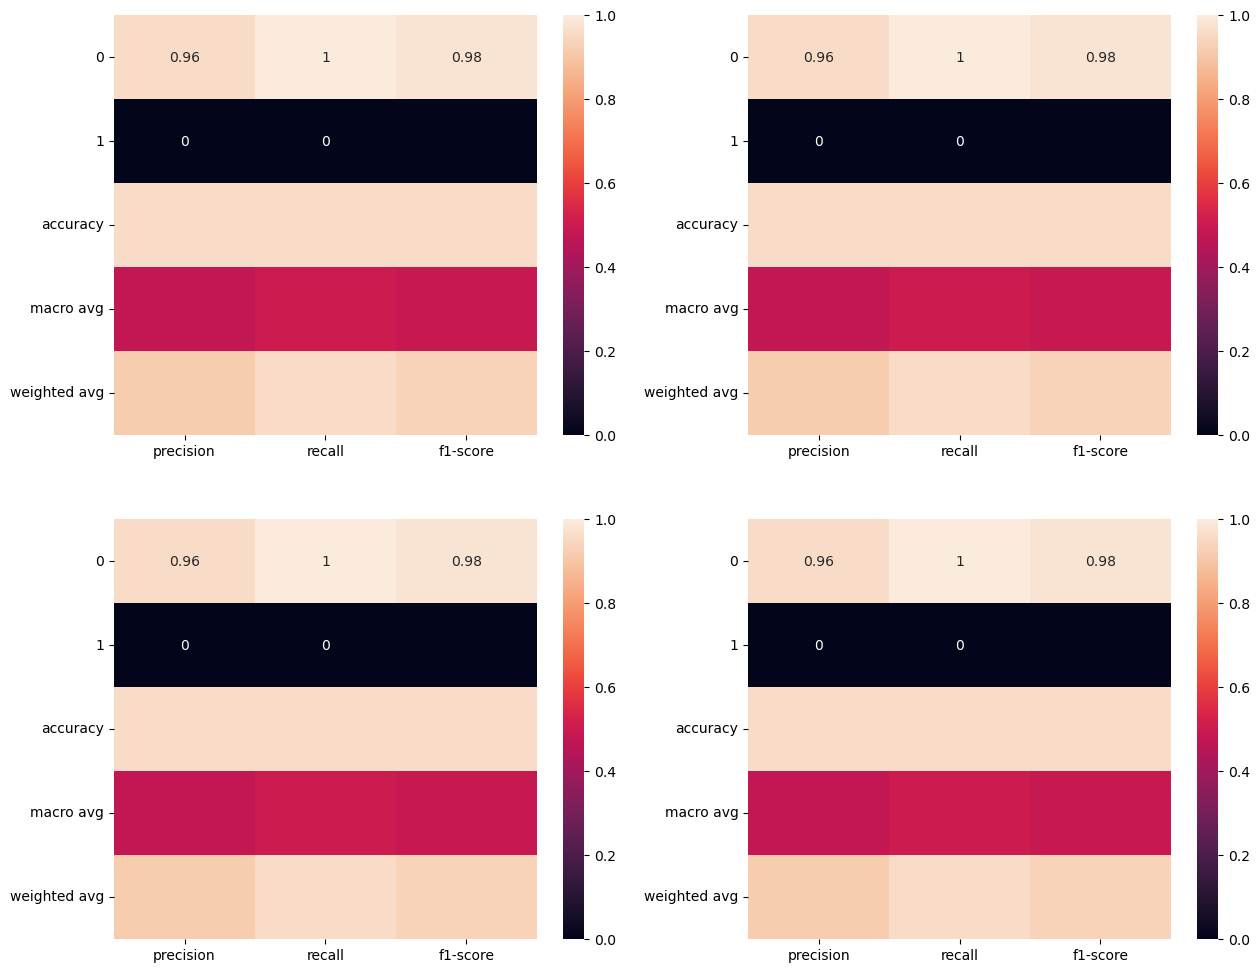

In [55]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

sns.heatmap(pd.DataFrame(xgboost_report).iloc[:-1, :].T, annot=True, ax=ax[0, 0])
sns.heatmap(pd.DataFrame(tree_report).iloc[:-1, :].T, annot=True, ax=ax[0, 1])
sns.heatmap(pd.DataFrame(lr_report).iloc[:-1, :].T, annot=True, ax=ax[1, 0])
sns.heatmap(pd.DataFrame(svm_report).iloc[:-1, :].T, annot=True, ax=ax[1, 1])

# Results and Analysis

From the results, we can see that the 4 models behave similarly, and most of all, they all fail in predicting stroke patients correctly. This is a major problem, and an hypothesis can be put forward that the dataset isn't good enough for us to get better results. A good way to surpass this problem would be to obtain more data for the models to try and get better correlations between the features and the outcome (probability of having a stroke or not). If obtaining more data isn't possible, we could also obtain more data by generating synthetic data. This would hopefully increase the precision and recall of the models, related to the non stroke outcome.